## NUTS limitations

The purpose of this notebook is to show some limitations of the nuts sampling algorithm besides not being able to sample from discrete rv's. In order to accomplish this we will make use of some test functions for optimization (https://en.wikipedia.org/wiki/Test_functions_for_optimization).
We will use Metropolis, Slice Sampling and NUTS to find the minima of the rosenbrock banana function and the himmelblau function. Defining them and assigning the log probability to the negative value (to find minima...):

Import modules and set random seed:

In [12]:
import requests
from ipywidgets import Image

import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

SEED = 12345
np.random.seed(SEED)

Sample from functions by defining the log_p for pm.DensityDist():

In [13]:
# Rosenbrock's banana function
def banana(z):
    z = z.T
    a = 1.
    b = 100.
    return (a-z[0])**2 + b*(z[1] - z[0]**2)**2

def banana_log_p(z):
    return -banana(z)

# Himmelblau's function
def himmelblau(z):
    z = z.T
    return (z[0]**2 + z[1] - 11)**2 + (z[0] + z[1]**2 - 7)**2

def himmelblau_log_p(z):
    return -himmelblau(z)

### Rosenbrocks Banana function

In [14]:
Image(value=requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Rosenbrock%27s_function_in_3D.pdf/page1-640px-Rosenbrock%27s_function_in_3D.pdf.jpg').content)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\x96\x00\x96\x00\x00\xff\xe2\n ICC_PROFILE\x00\x…

In [15]:
with pm.Model() as my_donut:
    pm.DensityDist('banana', logp=banana_log_p, shape=(2,))
    trace1 = pm.sample(500, step=pm.Metropolis(), random_seed=SEED)
    trace2 = pm.sample(500, step=pm.Slice(), random_seed=SEED)
    trace3 = pm.sample(500, step=pm.NUTS(), random_seed=SEED)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [banana]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:00<00:00, 8004.25draws/s]
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Slice: [banana]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:00<00:00, 4861.55draws/s]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [banana]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:04<00:00, 852.69draws/s] 
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The estimated 

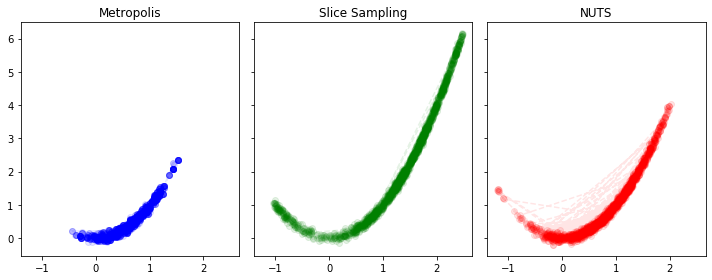

In [16]:
# plotting of trace results
alpha = 0.1

fig, ax = plt.subplots(1,3,figsize=(10,4),sharex=True, sharey=True)
tr1 = trace1['banana']
ax[0].plot(tr1[:,0], tr1[:,1], 'bo--',alpha=alpha)
ax[0].title.set_text('Metropolis')
   
tr2 = trace2['banana']
ax[1].plot(tr2[:,0], tr2[:,1], 'go--',alpha=alpha)
ax[1].title.set_text('Slice Sampling')

tr3 = trace3['banana']
ax[2].plot(tr3[:,0], tr3[:,1], 'ro--',alpha=alpha)
ax[2].title.set_text('NUTS')

plt.tight_layout()
plt.savefig("plot_banana.pdf")

### Himmelblau's function

In [17]:
Image(value=requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Himmelblau_function.svg/800px-Himmelblau_function.svg.png').content)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x02X\x08\x06\x00\x00\x00\x9av\x82p\x00\…

In [ ]:
with pm.Model() as m_hb:
    pm.DensityDist('himmelblau', logp=himmelblau_log_p, shape=(2,))
    trace1 = pm.sample(500, step=pm.Metropolis(), random_seed=SEED)
    trace2 = pm.sample(500, step=pm.Slice(), random_seed=SEED)
    trace3 = pm.sample(500, step=pm.NUTS(), random_seed=SEED)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [himmelblau]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:00<00:00, 6365.44draws/s]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Slice: [himmelblau]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:00<00:00, 4032.12draws/s]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [ ]:
# plotting of trace results
alpha = 0.1

fig, ax = plt.subplots(1,3,figsize=(10,4),sharex=True, sharey=True)

tr1 = trace1['himmelblau']
ax[0].plot(tr1[:,0], tr1[:,1], 'bo--',alpha=alpha)
ax[0].title.set_text('Metropolis')
   
tr2 = trace2['himmelblau']
ax[1].plot(tr2[:,0], tr2[:,1], 'go--',alpha=alpha)
ax[1].title.set_text('Slice Sampling')

tr3 = trace3['himmelblau']
ax[2].plot(tr3[:,0], tr3[:,1], 'ro--',alpha=alpha)
ax[2].title.set_text('NUTS')

plt.tight_layout()
plt.savefig("plot_himmelblau.pdf")